  Calling FFC just-in-time (JIT) compiler, this may take some time.
  Calling FFC just-in-time (JIT) compiler, this may take some time.
  Calling FFC just-in-time (JIT) compiler, this may take some time.
  Calling FFC just-in-time (JIT) compiler, this may take some time.


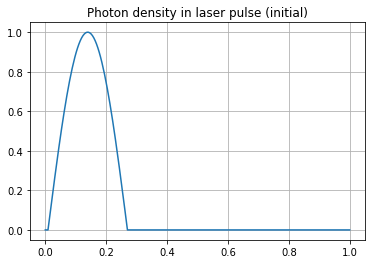

  Calling FFC just-in-time (JIT) compiler, this may take some time.
  Calling FFC just-in-time (JIT) compiler, this may take some time.


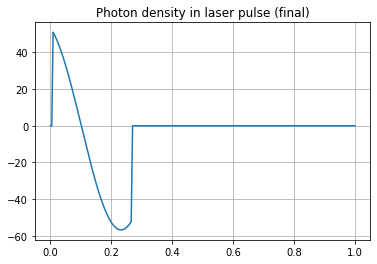

In [24]:
'''
File:  fn_simp_01.py

This simple test shows an initial laser pulse envelope.
The envelope propagates to the right, while also dispersing.
'''
from dolfin import *
import matplotlib.pyplot as plt

# Specify the BCs
def on_left(x, on_boundary):
    return (on_boundary and near(x[0], 0.))

def on_right(x, on_boundary):
    return (on_boundary and near (x[0], 1.))

# input configuration parameters
V_x = 0.7212389380530974
n_ds = 226
ds = 0.004424778761061947
lp_density = 1.
c_width = 0.4424778761061947
lp_width = 0.27876106194690264

# create a 1D mesh on the interval [0,1]
mesh = UnitIntervalMesh(n_ds)
V = FunctionSpace(mesh, "CG", 1)
v = TestFunction(V)

u = Function(V)
uprev = Function(V)
    
# instantiate the Dirichlet BCs
bc_left = DirichletBC(V, Constant(0), on_left)
bc_right = DirichletBC(V, Constant(0), on_right)
bc = [bc_left, bc_right]

# specify and apply the initial conditions
u0 = Expression(('x[0]>2.*ds && x[0]<(lp_width-2.*ds) ? \
                lp_density*sin(pi*(x[0]-2.*ds)/(lp_width-4.*ds)) : 0.'), \
                degree=1, lp_width=0.2, c_width=0.6, lp_density=1., ds=0.01)
u0.c_width = c_width
u0.lp_width = lp_width
u0.lp_density = lp_density
u0.ds = ds
    
# project the above expression onto the solution vector
u = interpolate(u0, V)
uprev.assign(u)

n_steps = 100
time = 0.81
dt = time / (n_steps + 1)

DT = Constant(dt)
VX = Constant(V_x)

# inital plot of the laser pulse envelope
uplot = project(u, V)
plot(uplot, title=('Photon density in laser pulse (initial)'))
plt.grid(True)
plt.show()
plt.close()

for i_loop in range(0, n_steps):
    F = ( (u - uprev) * v / DT + VX * u.dx(0) * v ) * dx
    solve(F==0, u, bc)
    uprev.assign(u)

# final plot of the laser pulse envelope
uplot = project(u, V)
plot(uplot, title=('Photon density in laser pulse (final)'))
plt.grid(True)
plt.show()
plt.close()